# Perspective Transform

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Read Camera Calibration values
import pickle
camera_calibration = pickle.load(open('./pickle_data/camera_calibration.p', 'rb'))
mtx = camera_calibration['mtx']
dist = camera_calibration['dist']

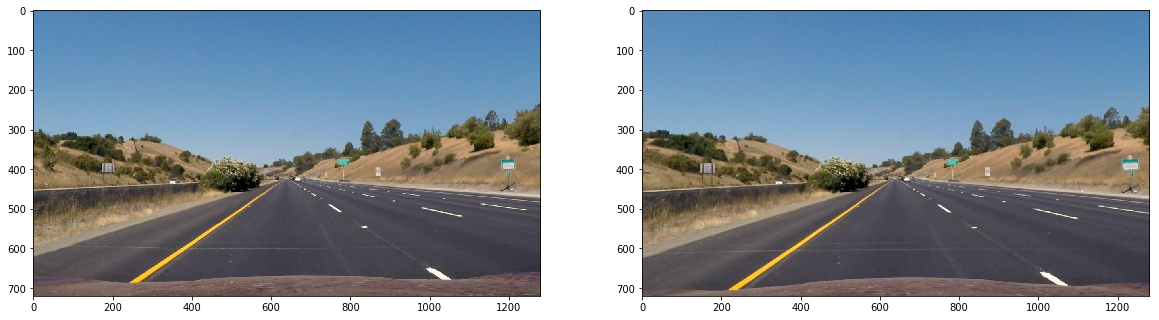

In [3]:
# Read and undistort the image
import os
image = mpimg.imread(os.path.join('./test_images', 'straight_lines1.jpg'))
undist = cv2.undistort(image, mtx, dist, None, mtx)

fig, axes = plt.subplots(ncols=2, figsize=(20,10))
axes = iter(axes)
next(axes).imshow(image)
next(axes).imshow(undist)


In [4]:
# Wrap a image
def corners_unwarp(img, mtx, dist, src):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
    offset = 0
    # Grab the image shape
    img_size = (gray.shape[1], gray.shape[0])

    
    offset = 0
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                 [img_size[0]-offset, img_size[1]-offset], 
                                 [offset, img_size[1]-offset]])
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped

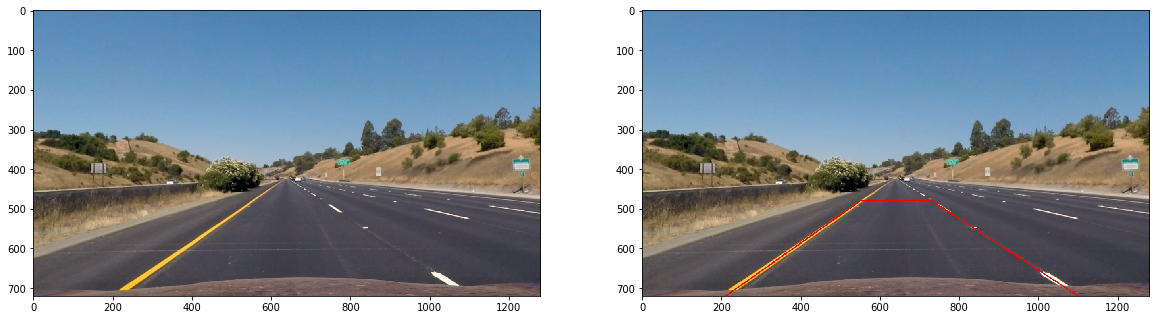

In [5]:
#0,0   fx,0   fx,fy  0,fy

ymax = undist.shape[0]
# Clock wise from top left.
src = np.array([ [550, 480], 
                             [730, 480], 
                             [1100, ymax], [210, ymax]])

with_lines = undist.copy()
color = [255, 0, 0]
w = 2

points = src.tolist()
cv2.line(with_lines, tuple(points[0]), tuple(points[1]), color, w)
cv2.line(with_lines, tuple(points[1]), tuple(points[2]), color, w)
cv2.line(with_lines, tuple(points[2]), tuple(points[3]), color, w)
cv2.line(with_lines, tuple(points[3]), tuple(points[0]), color, w)


fig, axes = plt.subplots(ncols=2, figsize=(20,10))
axes = iter(axes)
next(axes).imshow(undist)
next(axes).imshow(with_lines)


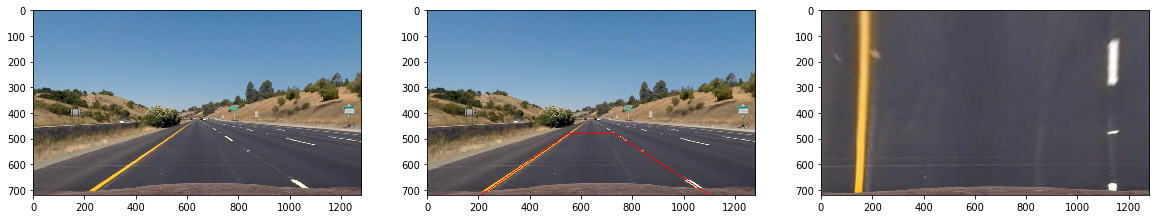

In [6]:
src = np.array(src,np.float32)
gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
img_size = (gray.shape[1], gray.shape[0])
offset = 150
dst = np.float32([[offset, 0], [img_size[0]-offset, 0], 
                             [img_size[0]-offset, img_size[1]], 
                             [offset, img_size[1]]])
# Given src and dst points, calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)



fig, axes = plt.subplots(ncols=3, figsize=(20,10))
axes = iter(axes)
next(axes).imshow(undist)
next(axes).imshow(with_lines)
next(axes).imshow(warped)

In [7]:
# Save the data
pickle.dump({ 'M': M, 'Minv': Minv}, open('./pickle_data/perspective_transform.p', 'wb'))